# Regresión Logística con Balanceo de datos

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [7]:
train = pd.read_csv('../Datasets/churn-bigml-80.csv')
train["flag_muestra"] = "train"
train.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,train
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,train
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,train
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,train
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,train


In [8]:
test = pd.read_csv('../Datasets/churn-bigml-20.csv')
test["flag_muestra"] = "test"
test.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,test
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,19.42,208.8,111,9.40,12.7,6,3.43,4,True,test
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,True,test
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,11.67,189.6,105,8.53,7.7,6,2.08,2,False,test
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,18.28,178.7,90,8.04,11.1,1,3.00,1,False,test


In [9]:
data = pd.concat([test, train], axis=0)
data.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,test
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,19.42,208.8,111,9.40,12.7,6,3.43,4,True,test
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,True,test
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,11.67,189.6,105,8.53,7.7,6,2.08,2,False,test
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,18.28,178.7,90,8.04,11.1,1,3.00,1,False,test


In [10]:
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
flag_muestra               object
dtype: object

In [11]:
data['Area code'] = data['Area code'].astype(object)

In [12]:
total_minutes = data['Total day minutes'] + data['Total eve minutes'] + data['Total night minutes'] + data['Total intl minutes']
data.insert(loc=len(data.columns)-2, column='Total minutes', value=total_minutes)
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Total minutes,Churn,flag_muestra
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,215.8,90,9.71,8.7,4,2.35,1,760.6,False,test
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,208.8,111,9.40,12.7,6,3.43,4,579.1,True,test
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,160.6,128,7.23,5.4,9,1.46,4,816.7,True,test
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,189.6,105,8.53,7.7,6,2.08,2,445.0,False,test
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,178.7,90,8.04,11.1,1,3.00,1,524.2,False,test


In [13]:
total_calls = data['Total day calls'] + data['Total eve calls'] + data['Total night calls'] + data['Total intl calls']
data.insert(loc=len(data.columns)-2, column='Total calls', value=total_calls)
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Total minutes,Total calls,Churn,flag_muestra
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,90,9.71,8.7,4,2.35,1,760.6,271,False,test
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,111,9.40,12.7,6,3.43,4,579.1,337,True,test
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,128,7.23,5.4,9,1.46,4,816.7,301,True,test
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,105,8.53,7.7,6,2.08,2,445.0,316,False,test
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,90,8.04,11.1,1,3.00,1,524.2,317,False,test


In [14]:
total_charge = data['Total day charge'] + data['Total eve charge'] + data['Total night charge'] + data['Total intl charge']
data.insert(loc=len(data.columns)-2, column='Total charge', value=total_charge)
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Total minutes,Total calls,Total charge,Churn,flag_muestra
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,9.71,8.7,4,2.35,1,760.6,271,73.32,False,test
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,9.40,12.7,6,3.43,4,579.1,337,54.20,True,test
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,7.23,5.4,9,1.46,4,816.7,301,92.29,True,test
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,8.53,7.7,6,2.08,2,445.0,316,41.05,False,test
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,8.04,11.1,1,3.00,1,524.2,317,49.60,False,test


In [15]:
data['c_International_plan'] = LabelEncoder().fit_transform(data["International plan"].values)
data['c_Voice_mail_plan'] = LabelEncoder().fit_transform(data["Voice mail plan"].values)
data.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total intl calls,Total intl charge,Customer service calls,Total minutes,Total calls,Total charge,Churn,flag_muestra,c_International_plan,c_Voice_mail_plan
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,4,2.35,1,760.6,271,73.32,False,test,0,0
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,6,3.43,4,579.1,337,54.20,True,test,0,0
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,9,1.46,4,816.7,301,92.29,True,test,0,0
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,6,2.08,2,445.0,316,41.05,False,test,0,0
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,1,3.00,1,524.2,317,49.60,False,test,0,0


### Prueba de normalidad
* Ho: la variable se aproxima a una distribución normal
* Ha: la variable no se aproxima a una distribución normal

In [16]:
variables = ['Number vmail messages', 'Total minutes', 'Total charge', 'Customer service calls']
alpha = 0.05
for var in variables:
    stat, p_value = ss.shapiro(data[var])
    
    print(f'Prueba de normalidad para la variable {var}:')
    print(f'Estadístico de prueba: {stat:.2f}')
    print(f'P-valor: {p_value:.2f}')
    
    if p_value < alpha:
        print('La hipótesis nula (Ho) se rechaza.')
        print('La variable no se aproxima a una distribución normal.')
    else:
        print('La hipótesis nula (Ho) no se rechaza.')
        print('La variable se aproxima a una distribución normal.')
    print()

Prueba de normalidad para la variable Number vmail messages:
Estadístico de prueba: 0.62
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
La variable no se aproxima a una distribución normal.

Prueba de normalidad para la variable Total minutes:
Estadístico de prueba: 1.00
P-valor: 0.66
La hipótesis nula (Ho) no se rechaza.
La variable se aproxima a una distribución normal.

Prueba de normalidad para la variable Total charge:
Estadístico de prueba: 1.00
P-valor: 0.87
La hipótesis nula (Ho) no se rechaza.
La variable se aproxima a una distribución normal.

Prueba de normalidad para la variable Customer service calls:
Estadístico de prueba: 0.88
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
La variable no se aproxima a una distribución normal.



### Prueba de Correlación
* Ho: No hay correlación entre las variables
* Ha: Existe correlación entre las variables

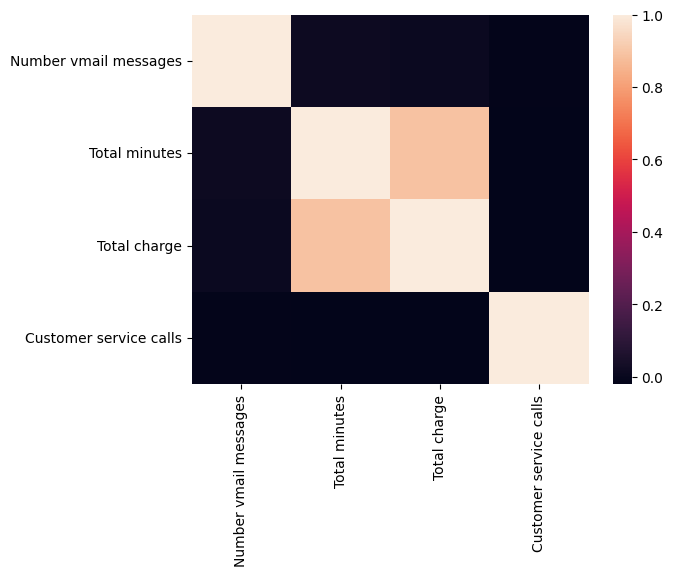

In [17]:
sns.heatmap(data.loc[:,['Number vmail messages','Total minutes','Total charge','Customer service calls']].corr(method = "pearson"))
plt.show()

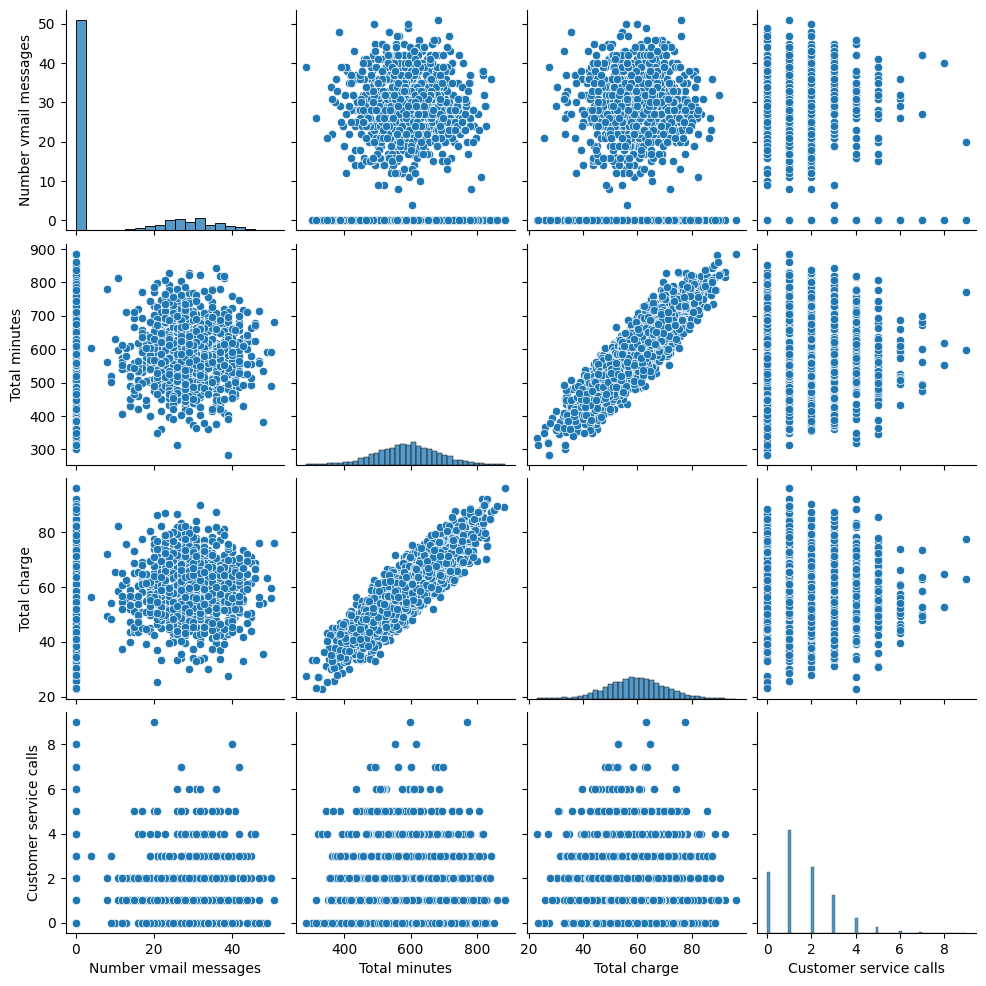

In [18]:
sns.pairplot(data.loc[:,['Number vmail messages','Total minutes','Total charge','Customer service calls']])

In [19]:
data.loc[:,['Number vmail messages','Total minutes','Total charge','Customer service calls']].corr(method = "pearson")

,Number vmail messages,Total minutes,Total charge,Customer service calls
Number vmail messages,1.000000,0.014779,0.009766,-0.013263
Total minutes,0.014779,1.000000,0.890804,-0.020969
Total charge,0.009766,0.890804,1.000000,-0.019873
Customer service calls,-0.013263,-0.020969,-0.019873,1.000000


In [20]:
variables = ['Number vmail messages','Total minutes','Total charge','Customer service calls']
alpha = 0.05
method = "spearmanr"
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        # para data no distribuida normalmente
        if method == "spearmanr": 
            correlation, p_value = ss.spearmanr(data[var1], data[var2])
            
        # para data no distribuida normalmente - preferido sobre spearman
        elif method == "kendall":
            correlation, p_value = ss.kendalltau(data[var1], data[var2])
            
        # para data distribuida normalmente
        elif method == "pearsonr":
            correlation, p_value = ss.pearsonr(data[var1], data[var2])

        
        print(f'Correlación entre {var1} y {var2}:')
        print(f'Coeficiente de correlación de {method}: {correlation:.2f}')
        print(f'P-valor: {p_value:.2f}')
        
        if p_value < alpha:
            print('La hipótesis nula (Ho) se rechaza.')
            print('Existe correlación entre las variables.')
        else:
            print('La hipótesis nula (Ho) no se rechaza.')
            print('No existe correlación entre las variables.')
        print()

Correlación entre Number vmail messages y Total minutes:
Coeficiente de correlación de spearmanr: 0.01
P-valor: 0.42
La hipótesis nula (Ho) no se rechaza.
No existe correlación entre las variables.

Correlación entre Number vmail messages y Total charge:
Coeficiente de correlación de spearmanr: 0.01
P-valor: 0.55
La hipótesis nula (Ho) no se rechaza.
No existe correlación entre las variables.

Correlación entre Number vmail messages y Customer service calls:
Coeficiente de correlación de spearmanr: -0.02
P-valor: 0.26
La hipótesis nula (Ho) no se rechaza.
No existe correlación entre las variables.

Correlación entre Total minutes y Total charge:
Coeficiente de correlación de spearmanr: 0.88
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
Existe correlación entre las variables.

Correlación entre Total minutes y Customer service calls:
Coeficiente de correlación de spearmanr: -0.03
P-valor: 0.15
La hipótesis nula (Ho) no se rechaza.
No existe correlación entre las variables.

Correlaci

In [21]:
data.Churn.value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

In [22]:
100*data['Churn'].value_counts(normalize=True)

Churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

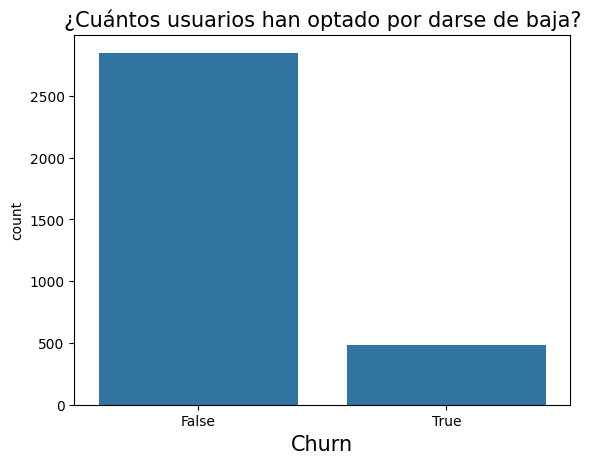

In [23]:
sns.countplot(data = data, x = 'Churn')
plt.xlabel('Churn', fontsize = 15)
plt.title('¿Cuántos usuarios han optado por darse de baja?', fontsize = 15)
plt.show()

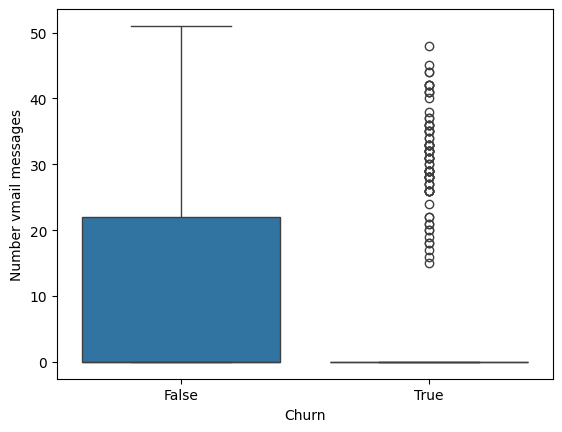

In [24]:
sns.boxplot(x='Churn',y='Number vmail messages',data=data)
plt.show()

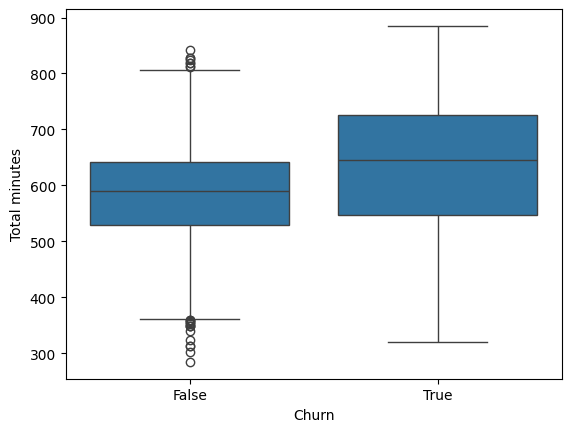

In [25]:
sns.boxplot(x='Churn',y='Total minutes',data=data)
plt.show()

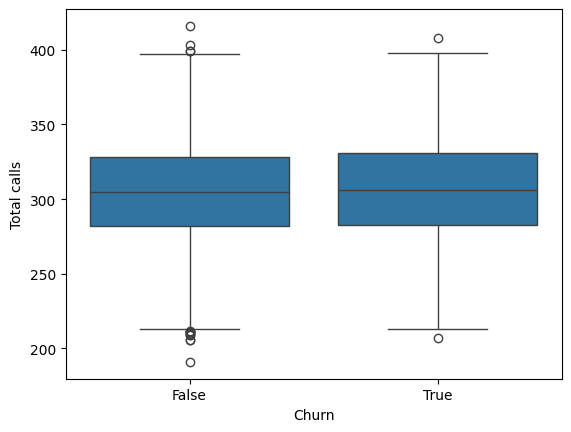

In [26]:
sns.boxplot(x='Churn',y='Total calls',data=data)
plt.show()

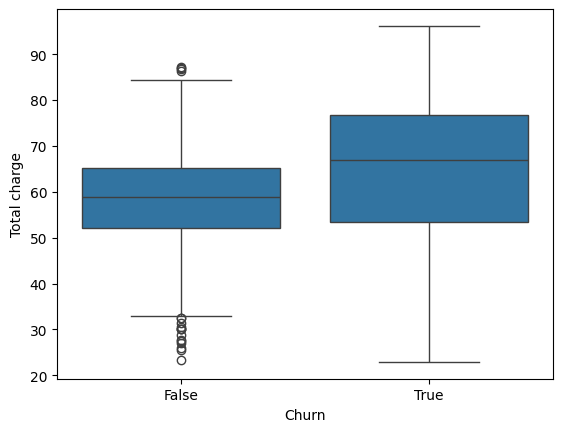

In [27]:
sns.boxplot(x='Churn',y='Total charge',data=data)
plt.show()

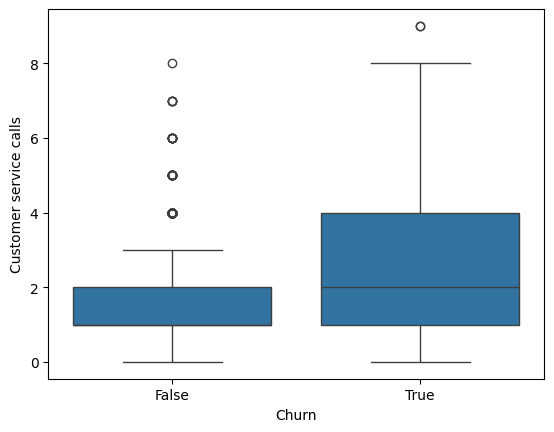

In [28]:
sns.boxplot(x='Churn',y='Customer service calls',data=data)
plt.show()

In [29]:
X = data[['c_International_plan','c_Voice_mail_plan','Number vmail messages','Total minutes','Total charge','Customer service calls']]
y = data['Churn']

In [30]:
X = X.to_numpy()
X[0:5]

array([[  0.  ,   0.  ,   0.  , 760.6 ,  73.32,   1.  ],
       [  0.  ,   0.  ,   0.  , 579.1 ,  54.2 ,   4.  ],
       [  0.  ,   0.  ,   0.  , 816.7 ,  92.29,   4.  ],
       [  0.  ,   0.  ,   0.  , 445.  ,  41.05,   2.  ],
       [  0.  ,   0.  ,   0.  , 524.2 ,  49.6 ,   1.  ]])

In [31]:
y = y.to_numpy()
y[0:5]

array([False,  True,  True, False, False])

In [32]:
Counter(y)

Counter({False: 2850, True: 483})

In [33]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
Counter(y_smote)

Counter({False: 2850, True: 2850})

In [34]:
oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(X, y)
Counter(y_over)

Counter({False: 2850, True: 2850})

In [35]:
undersample = RandomUnderSampler()
X_under, y_under = undersample.fit_resample(X, y)
Counter(y_under)

Counter({False: 483, True: 483})

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.20, random_state = 0)

In [37]:
transformer = StandardScaler()
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [38]:
classifier = LogisticRegression(max_iter = int(1e5)).fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [39]:
import joblib
joblib.dump(classifier, "model.pkl") 
#classifier = joblib.load("model.pkl")

['model.pkl']

Confusion matrix, without normalization
[[433 113]
 [131 463]]
Normalized confusion matrix
[[0.79304029 0.20695971]
 [0.22053872 0.77946128]]


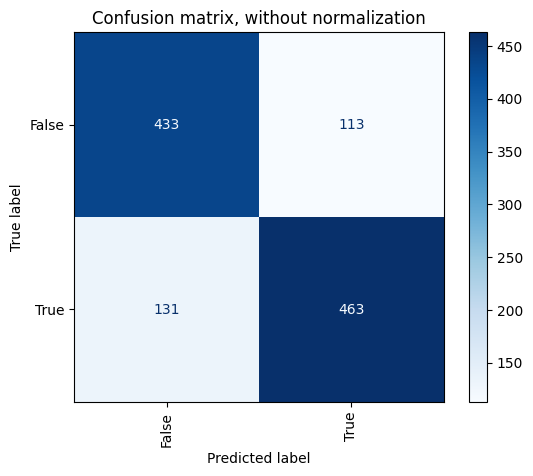

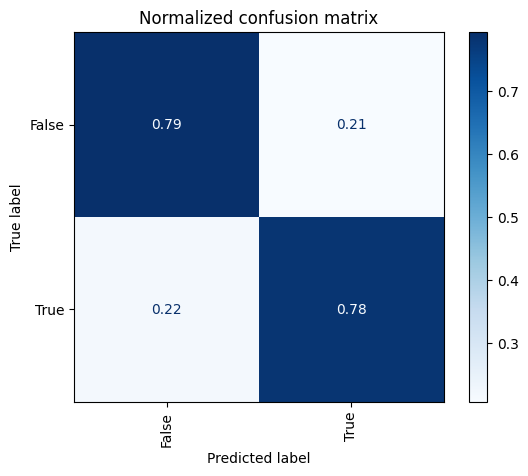

In [360]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm = confusion_matrix(y_test, y_pred)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    if normalize:
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

    print(title)
    print(cm if not normalize else cm_normalized)

plt.show()

In [361]:
y_pred_prob = classifier.predict_proba(X_test)
y_pred_prob[0:5]

array([[0.67696293, 0.32303707],
       [0.72475119, 0.27524881],
       [0.081061  , 0.918939  ],
       [0.15605337, 0.84394663],
       [0.78481524, 0.21518476]])

In [362]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8402338402338402

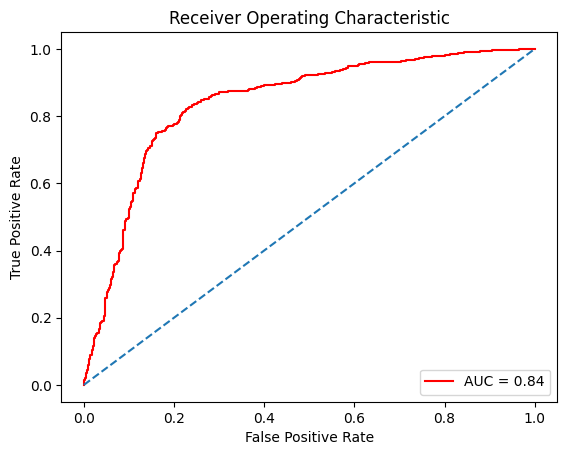

In [363]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [364]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.77      0.79      0.78       546
        True       0.80      0.78      0.79       594

    accuracy                           0.79      1140
   macro avg       0.79      0.79      0.79      1140
weighted avg       0.79      0.79      0.79      1140



In [365]:
dataf_combined = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)
dataf_combined.columns = ['c_International_plan','c_Voice_mail_plan','Number vmail messages','Total minutes','Total charge','Customer service calls','Churn', 'Churn_Pred', 'Churn_Pred_Prob_0', 'Churn_Pred_Prob_1']
dataf_combined.head(10)

,c_International_plan,c_Voice_mail_plan,Number vmail messages,Total minutes,Total charge,Customer service calls,Churn,Churn_Pred,Churn_Pred_Prob_0,Churn_Pred_Prob_1
0,-0.483623,-0.533480,-0.513702,0.282687,0.687502,-1.255324,False,False,0.676963,0.323037
1,-0.483623,1.882377,1.670019,0.383459,0.226821,0.133292,False,False,0.724751,0.275249
2,2.505174,1.882377,1.592029,-0.500002,-0.333097,1.521909,False,True,0.081061,0.918939
3,0.384224,-0.533480,-0.513702,-0.736196,-0.875546,2.216217,True,True,0.156053,0.843947
4,0.120553,1.882377,1.092558,-1.097882,-1.078601,0.960500,True,False,0.784815,0.215185
5,2.505174,-0.533480,-0.513702,0.974861,1.470629,-0.424636,True,True,0.028818,0.971182
6,-0.483623,-0.533480,-0.513702,-0.143878,-0.317767,-0.561016,False,False,0.739993,0.260007
7,-0.483623,1.882377,2.215950,-0.209429,0.193742,-1.255324,False,False,0.874682,0.125318
8,-0.483623,1.882377,2.215950,1.286486,1.326486,-0.561016,False,False,0.552083,0.447917
9,-0.483623,-0.533480,-0.513702,0.461728,0.323637,0.133292,False,True,0.453835,0.546165


In [366]:
df_original_features = pd.DataFrame(X_test, columns=['c_International_plan','c_Voice_mail_plan','Number vmail messages','Total minutes','Total charge','Customer service calls'])
df_original = pd.DataFrame(transformer.inverse_transform(df_original_features), columns=['c_International_plan','c_Voice_mail_plan','Number vmail messages','Total minutes','Total charge','Customer service calls'])

df_original[['Churn', 'Churn_Pred', 'Churn_Pred_Prob_0', 'Churn_Pred_Prob_1']] = dataf_combined[['Churn', 'Churn_Pred', 'Churn_Pred_Prob_0', 'Churn_Pred_Prob_1']]
df_original.head(10)

,c_International_plan,c_Voice_mail_plan,Number vmail messages,Total minutes,Total charge,Customer service calls,Churn,Churn_Pred,Churn_Pred_Prob_0,Churn_Pred_Prob_1
0,0.000000,0.0,0.000000,639.000000,70.450000,0.000000,False,False,0.676963,0.323037
1,0.000000,1.0,28.000000,649.300000,64.740000,2.000000,False,False,0.724751,0.275249
2,1.000000,1.0,27.000000,559.000000,57.800000,4.000000,False,True,0.081061,0.918939
3,0.290367,0.0,0.000000,534.858210,51.076513,5.000000,True,True,0.156053,0.843947
4,0.202147,1.0,20.595706,497.889629,48.559714,3.191412,True,False,0.784815,0.215185
5,1.000000,0.0,0.000000,709.748221,80.156612,1.196426,True,True,0.028818,0.971182
6,0.000000,0.0,0.000000,595.400000,57.990000,1.000000,False,False,0.739993,0.260007
7,0.000000,1.0,35.000000,588.700000,64.330000,0.000000,False,False,0.874682,0.125318
8,0.000000,1.0,35.000000,741.600000,78.370000,1.000000,False,False,0.552083,0.447917
9,0.000000,0.0,0.000000,657.300000,65.940000,2.000000,False,True,0.453835,0.546165


In [368]:
def asignar_categoria(valor):
    if valor <= 0.2:
        return 'MB'  # Muy bajo
    elif valor <= 0.4:
        return 'B'   # Bajo
    elif valor <= 0.6:
        return 'M'   # Medio
    elif valor <= 0.8:
        return 'A'   # Alto
    else:
        return 'MA'  # Muy alto

df_original['Score'] = df_original['Churn_Pred_Prob_1'].apply(asignar_categoria)
df_original

,c_International_plan,c_Voice_mail_plan,Number vmail messages,Total minutes,Total charge,Customer service calls,Churn,Churn_Pred,Churn_Pred_Prob_0,Churn_Pred_Prob_1,Score
0,0.000000,0.0,0.000000,639.000000,70.450000,0.000000,False,False,0.676963,0.323037,B
1,0.000000,1.0,28.000000,649.300000,64.740000,2.000000,False,False,0.724751,0.275249,B
2,1.000000,1.0,27.000000,559.000000,57.800000,4.000000,False,True,0.081061,0.918939,MA
3,0.290367,0.0,0.000000,534.858210,51.076513,5.000000,True,True,0.156053,0.843947,MA
4,0.202147,1.0,20.595706,497.889629,48.559714,3.191412,True,False,0.784815,0.215185,B
...,...,...,...,...,...,...,...,...,...,...,...
1135,0.000000,1.0,19.000000,615.000000,59.800000,0.000000,False,False,0.952981,0.047019,MB
1136,0.000000,0.0,0.000000,754.300000,73.030000,0.000000,False,False,0.615373,0.384627,B
1137,0.000000,0.0,0.000000,735.940310,77.982733,0.000000,True,False,0.532335,0.467665,M
1138,0.000000,0.0,0.000000,656.300000,70.890000,1.000000,False,False,0.519649,0.480351,M
